## **TASK-4: EMAIL SPAM DETECTION WITH MACHINE LEARNING**

In [1]:
from google.colab import files
uploaded_files=files.upload()

Saving spam.csv to spam.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

In [4]:
df = pd.read_csv(r"spam.csv",encoding="ISO.8859.1")

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [10]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [11]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
del df['Unnamed: 2']
del df['Unnamed: 3']
del df['Unnamed: 4']

In [13]:
df.rename(columns={"v1":"Spam","v2":"Mail"},inplace=True)

In [14]:
s=df.groupby('Spam')['Mail'].count()
s

Spam
ham     4825
spam     747
Name: Mail, dtype: int64

In [15]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['s']=label_encoder.fit_transform(df['Spam'])
df.head()

,Spam,Mail,s
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [16]:
x=df['Mail']
y=df['s']

<Axes: xlabel='s', ylabel='Count'>

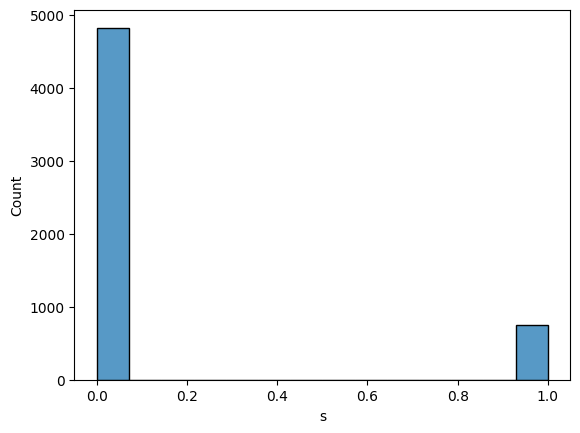

In [17]:
sns.histplot(y)

<Axes: >

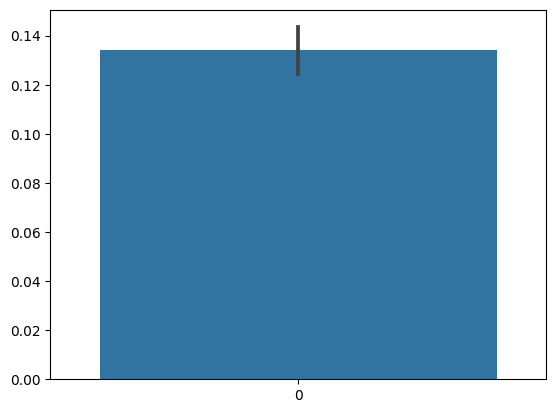

In [18]:
sns.barplot(y)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()

In [21]:
x_train_count=v.fit_transform(x_train.values)
x_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()

In [23]:
model.fit(x_train_count,y_train)

MultinomialNB()

In [24]:
x_test_count=v.transform(x_test)
model.predict(x_test_count)

array([0, 1, 0, ..., 0, 1, 0])

In [25]:
pred=model.predict(x_test_count)

In [26]:
pred

array([0, 1, 0, ..., 0, 1, 0])

In [27]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,pred)
cm

array([[1451,    6],
       [  17,  198]])

In [28]:
model.score(x_test_count,y_test)

0.986244019138756